# Emotion Detection (Sentiment Analysis) from Text Input

### Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import os
#
import re
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
st = PorterStemmer()
from nltk.tokenize import word_tokenize 
from textblob import Word
from textblob import TextBlob
set(stopwords.words('english'))
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# To sort dictionary values
import operator 
#
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
#
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

### Create Training Dataset

In [2]:
def get_train_data(train_path, mix):
    '''Function to fetch train data and create a DataFrame for Training a Model'''
    
    print("Get Training Data")
    
    text = []
    rating = []
    try:
        ## Get Positive Label Train Data
        for filename in os.listdir(train_path+"pos"):
            pos_data_train = open(train_path+"pos/"+filename, 'r' , encoding="ISO-8859-1").read()
            text.append(pos_data_train)
            rating.append("1")
            
        ## Get Negative Lael Train Data
        for filename in os.listdir(train_path+"neg"):
            neg_data_train = open(train_path+"neg/"+filename, 'r' , encoding="ISO-8859-1").read()
            text.append(neg_data_train)
            rating.append("0")
            
        train_dataset = list(zip(text,rating))    
        
        ## Shuffle Data
        if mix:
            np.random.shuffle(train_dataset)
        
        ## Create a Datafrane
        df_train = pd.DataFrame(data = train_dataset, columns=['Review', 'Rating'])
        
        return(df_train)
    
    except Exception as e:
        print("There is an eror in get_train_data: ", e)
        pass

### Create Test Dataset

In [3]:
def get_test_data(test_path):
    '''Function to fetch Test data and create a DataFrame Testing Accracy of the Model'''
    print("Get Test Data")

    text = []
    rating = []
    try:
        ## Get Positive Label Train Data
        for filename in os.listdir(test_path+"pos"):
            pos_data = open(test_path+"pos/"+filename, 'r' , encoding="ISO-8859-1").read()
            text.append(pos_data)
            rating.append("1")
        ## Get Negative Lael Train Data
        for filename in os.listdir(test_path+"neg"):
            neg_data = open(test_path+"neg/"+filename, 'r' , encoding="ISO-8859-1").read()
            text.append(neg_data)
            rating.append("0")
            
        test_dataset = list(zip(text,rating)) 
        
        ## Create a Datafrane
        df_test  = pd.DataFrame(data = test_dataset, columns=['Review', 'Rating'])
        return(df_test)
    except Exception as ex:
        print("There is an eror in get_test_data: ", ex)

### Data Preprocessing

In [4]:
def clean_data(text):
    '''Function to clean Review Text'''
    print("Start Data Preprocessing")
    stemmer= PorterStemmer()
    
    try:
        # Preprocessing
        # convert to lower case
        clean_text =  text.str.lower()
        # Remove Numbers
        clean_text = clean_text.str.replace('\d+', '')
        # Remove trailing spaces
        clean_text = clean_text.str.strip()
        # Remove Punctuations
        clean_text = clean_text.str.replace('[^\w\s]',' ')
        # Remove <br>
        clean_text = clean_text.str.replace('br', '')
        # Remove extra space in between words
        clean_text = clean_text.str.replace(' +', ' ')
        # Remove Numbers
        clean_text = clean_text.str.replace('\d+', '')
        # remove stop words
        stop = stopwords.words('english')
        stop.extend(["movie","movies","film","one"])
        clean_text =   clean_text.apply(lambda x: " ".join(x for x in x.split() if x not in stop ))
            # Stemming
            #clean_text =   clean_text.apply(lambda x: " ".join(stemmer.stem(x) for x in x.split() ))


        return clean_text
    except Exception as e:
        print("In Exception of clean_data: ", e)
        return None

### Tokenize the Reviews

In [5]:
def tokenization(df):
    try: 
        
        '''Tokenize the Review Text'''
        print("Token Review Text ")
        # Tokenize 
        df["Clean_Review"] = df["Clean_Review"].astype(str).str.strip().str.split('[\W_]+')
        # Initialize a CountVectorizer object: count_vect
        count_vec = CountVectorizer(analyzer='word',tokenizer=lambda doc: doc, lowercase=False, max_df = 0.70, min_df = 100)
        words_vec = count_vec.fit(df["Clean_Review"])
        bag_of_words = words_vec.transform(df["Clean_Review"])
        tokens = count_vec.get_feature_names()
        df_words = pd.DataFrame(data=bag_of_words.toarray(),columns=tokens)
       
        return df_words
    except Exception as E:
        print("Error in tokenization: ",e)

### Prepare Data

In [6]:
if __name__ == "__main__":

    train_path = "aclImdb/train/"
    test_path = "aclImdb/test/"
    df_tarin_reviews = get_train_data(train_path, True)
    df_test_reviews =  get_test_data(test_path)
    # Merge
    df_reviews = pd.concat([df_tarin_reviews,df_test_reviews], axis = 0)
    df_reviews = df_reviews.reset_index()
    # Clean the Review Data
    df_reviews["Clean_Review"] = clean_data(df_reviews.Review)
    del df_reviews["Review"]

Get Training Data
Get Test Data
Start Data Preprocessing


In [7]:
df_reviews.shape

(50000, 3)

In [8]:
df_reviews.head()

,index,Rating,Clean_Review
0,0,0,finished seeing minutes ago wow still cant bel...
1,1,0,fact never sure billy crystal wanted recreate ...
2,2,0,uninspired direction leaves decent cast strand...
3,3,1,finnish version robert altman short cuts set s...
4,4,0,murky video beginning sporadically throughout ...


### Words Frequency Distribution

In [9]:
# join the words in string
words = ' '.join(df_reviews['Clean_Review'])
words = words.split()
#print(words)
# create a empty dictionary
data = dict()
#  Get frequency for each words where word is the key and the count is the value
for word in (words):
    word = word.lower()
    data[word] = data.get(word, 0) + 1
# Sort the dictionary in reverse order to print first the most used terms    
dict(sorted(data.items(), key=operator.itemgetter(1),reverse=True))

{'like': 40170,
 'good': 29752,
 'time': 25105,
 'even': 24872,
 'would': 24602,
 'story': 23112,
 'really': 23093,
 'see': 23025,
 'well': 21250,
 'much': 19317,
 'bad': 18471,
 'get': 18417,
 'people': 18183,
 'great': 18144,
 'also': 17977,
 'first': 17581,
 'made': 16152,
 'make': 15899,
 'way': 15638,
 'could': 15565,
 'characters': 14452,
 'think': 14336,
 'watch': 13947,
 'character': 13903,
 'films': 13751,
 'two': 13544,
 'many': 13446,
 'seen': 13414,
 'love': 13005,
 'plot': 12983,
 'never': 12981,
 'life': 12907,
 'acting': 12865,
 'show': 12657,
 'best': 12611,
 'know': 12506,
 'little': 12433,
 'ever': 12028,
 'man': 11817,
 'better': 11427,
 'end': 11120,
 'scene': 10965,
 'still': 10858,
 'say': 10766,
 'scenes': 10477,
 'something': 10141,
 'go': 9962,
 'back': 9675,
 'real': 9428,
 'thing': 9172,
 'watching': 9164,
 'actors': 8950,
 'director': 8807,
 'years': 8760,
 'funny': 8757,
 'though': 8750,
 'old': 8648,
 'another': 8591,
 'work': 8544,
 'actually': 8470,
 'no

### Wordcloud

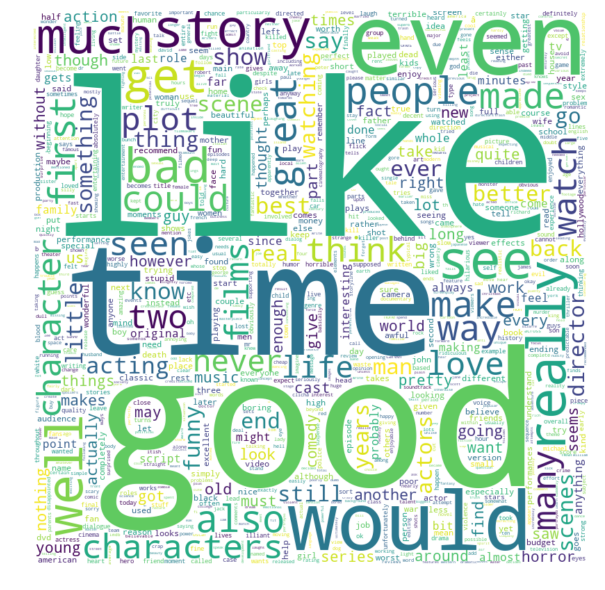

In [10]:
word_cloud = WordCloud(width = 800, height = 800, background_color ='white',max_words = 1000)
word_cloud.generate_from_frequencies(data)
# plot the WordCloud image                        
plt.figure(figsize = (10, 8), edgecolor = 'k') 
plt.imshow(word_cloud,interpolation = 'bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

## Rule-based methods:

In [11]:
df_reviews['sentiment_score'] = [round(TextBlob(article).sentiment.polarity, 3)for article in df_reviews['Clean_Review']]

In [12]:
df_reviews.head()

,index,Rating,Clean_Review,sentiment_score
0,0,0,finished seeing minutes ago wow still cant bel...,-0.123
1,1,0,fact never sure billy crystal wanted recreate ...,-0.056
2,2,0,uninspired direction leaves decent cast strand...,-0.035
3,3,1,finnish version robert altman short cuts set s...,0.259
4,4,0,murky video beginning sporadically throughout ...,-0.056


In [13]:
df_reviews['sentiment_score'].describe()

count    50000.000000
mean         0.095337
std          0.172769
min         -1.000000
25%         -0.009000
50%          0.097000
75%          0.203000
max          1.000000
Name: sentiment_score, dtype: float64

## Feature-based methods:

### Prepare Training Data for Modelling

In [14]:
del df_reviews["sentiment_score"]
df = tokenization(df_reviews)
df = pd.concat([df_reviews, df], axis = 1 )
del df["Clean_Review"]
del df["index"]
df.head()

Token Review Text 


,Rating,aaron,abandoned,abc,abilities,ability,able,aboard,abound,absence,...,youth,youthful,youtube,z,zero,zombie,zombies,zone,â,ã
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Train Test Split

In [15]:
X = df.loc[:, df.columns != "Rating"]
y = df.filter(['Rating'],axis =1)
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [16]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(35000, 6121)
(35000, 1)
(15000, 6121)
(15000, 1)


### Logistic Regression Model

In [17]:
mod_lr = LogisticRegression()
mod_lr.fit(X_train, y_train)

/Users/oindrilasen/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/oindrilasen/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
#Predicting the Ratinf using test set 
y_test["lr_pred_rating"] = mod_lr.predict(X_test)

/Users/oindrilasen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
y_test.head()

,Rating,lr_pred_rating
33553,1,1
9427,0,0
199,0,0
12447,1,1
39489,0,1


### Test Accuracy

In [20]:
results = confusion_matrix(y_test.Rating, y_test.lr_pred_rating) 
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y_test.Rating, y_test.lr_pred_rating)) 
print ('Report : ')
print (classification_report(y_test.Rating, y_test.lr_pred_rating) )

Confusion Matrix :
[[6453  991]
 [1001 6555]]
Accuracy Score : 0.8672
Report : 
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      7444
           1       0.87      0.87      0.87      7556

   micro avg       0.87      0.87      0.87     15000
   macro avg       0.87      0.87      0.87     15000
weighted avg       0.87      0.87      0.87     15000



### Random Forest Model

In [21]:
# train a random forest classifier
mod_rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
mod_rf.fit(X_train, y_train)

/Users/oindrilasen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [22]:
#Predicting the Ratinf using test set 
y_test["rf_pred_rating"] = mod_rf.predict(X_test)

/Users/oindrilasen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
results = confusion_matrix(y_test.Rating, y_test.rf_pred_rating) 
print ('RF Confusion Matrix :')
print(results) 
print ('RF Accuracy Score :',accuracy_score(y_test.Rating, y_test.rf_pred_rating)) 
print ('RF Report : ')
print (classification_report(y_test.Rating, y_test.rf_pred_rating) )

RF Confusion Matrix :
[[6394 1050]
 [1194 6362]]
RF Accuracy Score : 0.8504
RF Report : 
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      7444
           1       0.86      0.84      0.85      7556

   micro avg       0.85      0.85      0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000



### SGDClassifier Model

In [24]:
# train a random forest classifier
mod_sgd = SGDClassifier(loss='hinge',
                    penalty='l2',
                    alpha=1e-3,
                    random_state=42,
                    max_iter=100,
                    learning_rate='optimal',
                    tol=None)
mod_sgd.fit(X_train, y_train)

/Users/oindrilasen/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Users/oindrilasen/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=100,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [25]:
#Predicting the Ratinf using test set 
y_test["sgd_pred_rating"] = mod_sgd.predict(X_test)

/Users/oindrilasen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [26]:
results = confusion_matrix(y_test.Rating, y_test.sgd_pred_rating) 
print ('SGD Confusion Matrix :')
print(results) 
print ('SGD Accuracy Score :',accuracy_score(y_test.Rating, y_test.sgd_pred_rating)) 
print ('SGD Report : ')
print (classification_report(y_test.Rating, y_test.sgd_pred_rating) )

SGD Confusion Matrix :
[[6572  872]
 [ 859 6697]]
SGD Accuracy Score : 0.8846
SGD Report : 
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      7444
           1       0.88      0.89      0.89      7556

   micro avg       0.88      0.88      0.88     15000
   macro avg       0.88      0.88      0.88     15000
weighted avg       0.88      0.88      0.88     15000

